In [1]:
import glob
import os
import pandas as pd
import numpy
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 200
#columns = ["ss_pred"] + list(range(1,124))
columns = ['sequence','ss','ss_nprofile','ss_profile','dstr','dstr_core','dstr_surf','hydropathy','F','aro','round of design','result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
ss3_profile = {'lathander':86.992,'lliira':91.057,'mystra':88.618,'oghma':91.057,'rao':90.244,'selune':90.244,'sune':89.431,'TMB1_1':90.244,'TMB1_2':71.545,'TMB1_3':86.992,'TMB1_4':75.610,'TMB1_5':76.423,'TMB1_6':75.610,'TMB1_7':87.805,'TMB1_8':86.179,'TMB1_9':73.984,'TMB1_10':86.992,'TMB1_11':82.114,'TMB1_12':73.984,'TMB1_13':71.545,'TMB1_14':75.610,'TMB1_15':84.553,'TMB1_16':76.423,'TMB2_1':89.431,'TMB2_2':89.431,'TMB2_3':87.805,'TMB2_4':87.805,'TMB2_5':85.366,'TMB2_6':87.805,'TMB2_7':47.967,'TMB2_8':62.602,'TMB2_9':86.992,'TMB2_10':86.992,'TMB2_11':64.228,'TMB2_12':90.244,'TMB2_13':61.789,'TMB2_14':87.805,'TMB2_15':87.805,'TMB2_16':65.041,'TMB2_17':88.618,'TMB2_18':90.244,'TMB2_19':85.366,'TMB2_20':86.992,'tymora':86.179,'waukeen':89.431}
ss3_nprofile = {'lathander':84.553,'lliira':85.366,'mystra':82.927,'oghma':83.740,'rao':83.740,'selune':82.114,'sune':85.366,'TMB1_1':72.358,'TMB1_2':71.545,'TMB1_3':76.423,'TMB1_4':73.984,'TMB1_5':73.984,'TMB1_6':78.049,'TMB1_7':81.301,'TMB1_8':75.610,'TMB1_9':78.049,'TMB1_10':78.862,'TMB1_11':78.862,'TMB1_12':80.488,'TMB1_13':71.545,'TMB1_14':73.984,'TMB1_15':79.675,'TMB1_16':73.984,'TMB2_1':65.854,'TMB2_2':53.659,'TMB2_3':64.228,'TMB2_4':56.911,'TMB2_5':68.293,'TMB2_6':60.163,'TMB2_7':55.285,'TMB2_8':64.228,'TMB2_9':61.789,'TMB2_10':60.976,'TMB2_11':66.667,'TMB2_12':57.724,'TMB2_13':61.789,'TMB2_14':64.228,'TMB2_15':65.854,'TMB2_16':65.041,'TMB2_17':67.480,'TMB2_18':57.724,'TMB2_19':69.106,'TMB2_20':63.415,'tymora':84.553,'waukeen':82.927}
results = {'lathander':"No expression",'lliira':"No expression",'mystra':"No expression",'oghma':"No expression",'rao':"No expression",'selune':"No expression",'sune':"No expression",'TMB1_1':"No expression",'TMB1_2':"No expression",'TMB1_3':"No expression",'TMB1_4':"No expression",'TMB1_5':"No expression",'TMB1_6':"No expression",'TMB1_7':"No expression",'TMB1_8':"No expression",'TMB1_9':"No expression",'TMB1_10':"No expression",'TMB1_11':"No expression",'TMB1_12':"No expression",'TMB1_13':"No expression",'TMB1_14':"No expression",'TMB1_15':"No expression",'TMB1_16':"No expression",'TMB2_1':"Aggregation",'TMB2_2':"Misfolded",'TMB2_3':"Folded?",'TMB2_4':"Misfolded",'TMB2_5':"Aggregation",'TMB2_6':"No expression",'TMB2_7':"Misfolded",'TMB2_8':"Folded?",'TMB2_9':"No expression",'TMB2_10':"Aggregation",'TMB2_11':"Aggregation",'TMB2_12':"Misfolded",'TMB2_13':"Aggregation",'TMB2_14':"No expression",'TMB2_15':"Folded?",'TMB2_16':"Aggregation",'TMB2_17':"Folded?",'TMB2_18':"No expression",'TMB2_19':"Misfolded",'TMB2_20':"Misfolded",'tymora':"No expression",'waukeen':"No expression"}

df = pd.DataFrame(columns=columns)

for file in glob.glob("*_nprofile/*.fasta*"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if ">" in line:
                pass
            else:
                if line[0] == "M":
                    sequence = line[1:].strip()
                else:
                    sequence = line.strip()
#        for line in in_f:
#            if "DSSP" in line:
#                for line in in_f:
#                    vals = line.split()
#                    if int(vals[0]) == 1 and vals[1] == "M":
#                        pass
#                    else:
#                        sequence += vals[1]
#                        ss += vals[2]
    print(design_name, len(sequence))
    ss_profile = ss3_profile[design_name]
    ss_nprofile = ss3_nprofile[design_name]
    distr = aa_distribution(sequence)
    distr_surf = aa_distribution_surface(sequence)
    distr_core = aa_distribution_core(sequence)
    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    
    F_freq = distr['F']
    aro_freq = distr['F'] + distr['W'] + distr['Y']
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,ss_profile,dstr_r,dstr_core_r,dstr_surf_r,hydro,F_freq, aro_freq,dround,outcome]
print(df)


TMB2_12 123


NameError: name 'aa_distribution' is not defined

In [11]:
pd.options.display.max_colwidth = 200
#columns = ["ss_pred"] + list(range(1,124))
columns = ['sequence','ss','ss_nprofile','dstr','round','hydropathy','result']
df = pd.DataFrame(columns=columns)

for file in glob.glob("*_nprofile/*.ss3"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if "DSSP" in line:
                for line in in_f:
                    vals = line.split()
                    if int(vals[0]) == 1 and vals[1] == "M":
                        pass
                    else:
                        sequence += vals[1]
                        ss += vals[2]
#    ss_nprofile = ss3_nprofile[design_name]
    ss_nprofile = ss_pred(ss)
    distr = aa_distribution(sequence)    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    hydro = GRAVY(sequence)
    outcome = results[design_name]
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,dstr_r,dround,hydro,outcome]
print(df["ss"])

for file in glob.glob("*_nprofile/*.ss3_noprof.txt"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if "DSSP" in line:
                for line in in_f:
                    vals = line.split()
                    if int(vals[0]) == 1 and vals[1] == "M":
                        pass
                    else:
                        sequence += vals[1]
                        ss += vals[2]
                        
#    ss_nprofile = ss3_nprofile[design_name]
    ss_nprofile = ss_pred(ss)
    distr = aa_distribution(sequence)    
    keys = set(native.keys()) | set(distr.keys())
    hydro = GRAVY(sequence)
    outcome = results[design_name]
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,dstr_r,dround,hydro,outcome]
    
print(df)

TypeError: ss_pred() missing 2 required positional arguments: 'dround' and 'design_name'

In [2]:
def aa_distribution(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,10,11,12,13,14,15,16,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,88,89,90,91,92,93,94,100,101,102,103,104,105,106,107,108]
        elif len(sequence) == 111:
            positions = [9,10,11,12,13,14,15,16,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,78,79,80,81,82,83,84,85,86,90,91,92,93,94,95,96,102,103,104,105,106,107,108,109,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
        elif design_name == "4fuv":
            positions = [7,8,9,10,11,12,13,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,43,44,45,46,47,48,49,50,51,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121]
        elif design_name == "4rlc":
            positions = [5,6,7,8,9,10,11,12,18,19,20,21,22,23,24,25,26,30,31,32,33,34,35,36,42,43,44,45,46,47,48,49,50,59,60,61,62,63,64,65,71,72,73,74,75,76,77,78,79,80,81,85,86,87,88,89,90,91,92,93,99,100,101,102,103,104,105,106,107,108,109]
        elif design_name == "1p4t":
            positions = [5,6,7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,27,28,29,30,33,34,35,36,37,38,39,40,41,47,48,49,50,51,52,53,54,55,56,57,65,66,67,68,69,70,71,72,73,79,80,81,82,83,84,85,86,87,88,89,90,91,95,96,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121,122,123]
        elif design_name == "1thq":
            positions = [3,4,5,6,7,8,9,10,16,17,18,19,20,21,22,23,24,25,26,30,31,32,33,34,35,36,37,38,39,40,46,47,48,49,50,51,52,53,54,55,56,57,58,68,69,70,71,72,73,74,75,76,77,78,84,85,86,87,88,89,90,91,92,93,94,95,96,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119]
        elif design_name == "2erv":
            positions = [2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,37,38,39,40,41,42,43,44,45,46,47,53,54,55,56,67,58,59,60,61,62,63,64,65,72,73,74,75,76,77,78,79,80,81,82,88,89,90,91,92,93,94,95,96,97,98,99,100,104,105,106,107,108,109,110,116,117,118,119,120,121,122]
    else:
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
        
    return(aa_dict)

In [3]:
def aa_distribution_core(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,77,79,81,83,89,91,93,101,103,105,107]
        elif len(sequence) == 111:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,79,81,83,85,91,93,95,103,105,107,109] 
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
        elif design_name == "4fuv":
            positions = [8,10,12,20,22,24,26,32,34,36,44,46,48,50,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,]
        elif design_name == "4rlc":
            positions = [5,7,9,11,19,21,23,25,31,33,35,43,45,47,49,60,62,64,72,74,76,78,80,86,88,90,92,100,102,104,106,108]
        elif design_name == "1p4t":
            positions = [7,9,11,13,21,23,25,27,29,34,36,38,40,48,50,52,54,56,66,68,70,72,80,82,84,86,88,90,96,98,100,102,104,112,114,116,118,120,122]
        elif design_name == "1thq":
            positions = [3,5,7,9,17,19,21,23,25,31,33,35,37,39,47,49,51,53,55,57,69,71,73,75,77,85,87,89,91,93,95,100,102,104,112,114,116,118]
        elif design_name == "2erv":
            positions = [2,4,6,8,16,18,20,22,24,38,40,42,44,46,54,56,58,60,62,64,73,75,77,79,81,89,91,93,95,97,99,105,107,109,117,119,121]   
    else:
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
        
    return(aa_dict)

In [4]:
def aa_distribution_surface(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,76,78,80,82,84,88,90,92,94,100,102,104,106,108]
        elif len(sequence) == 111:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,78,80,82,84,86,90,92,94,96,102,104,106,108,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
        elif design_name == "4fuv":
            positions = [7,9,11,13,19,21,23,25,27,31,33,35,37,43,45,47,49,51,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121]
        elif design_name == "4rlc":
            positions = [6,8,10,12,18,20,22,24,26,30,32,34,36,42,44,46,48,50,59,61,63,65,71,73,75,77,79,81,85,87,89,91,93,99,101,103,105,107,109]
        elif design_name == "1p4t":
            positions = [6,8,10,12,14,20,22,24,26,28,30,33,35,37,39,41,47,49,51,53,55,57,65,67,69,71,73,79,81,83,85,87,89,91,95,97,99,101,103,105,111,113,115,117,119,121,123]
        elif design_name == "1thq":
            positions = [4,6,8,10,16,18,20,22,24,26,30,32,34,36,38,40,46,48,50,52,54,56,58,68,70,72,74,76,78,84,86,88,90,92,94,96,99,101,103,105,111,113,115,117,119]
        elif design_name == "2erv":
            positions = [3,5,7,9,15,17,19,21,23,25,37,39,41,43,45,47,53,55,67,59,61,63,65,72,74,76,78,80,82,88,90,92,94,96,98,100,104,106,108,110,116,118,120,122]   
    else:
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
        
    return(aa_dict)

In [5]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY(sequence):
    tot_score = 0
    for aa in sequence:
        tot_score += hydro_scale[aa]
    hydro_score = tot_score/len(sequence)
    
    return hydro_score

In [6]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_core(sequence,dround,design_name):
    tot_score = 0
    n_resi = 0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,77,79,81,83,89,91,93,101,103,105,107]
        elif len(sequence) == 111:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,79,81,83,85,91,93,95,103,105,107,109]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
        elif design_name == "4fuv":
            positions = [8,10,12,20,22,24,26,32,34,36,44,46,48,50,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,]
        elif design_name == "4rlc":
            positions = [5,7,9,11,19,21,23,25,31,33,35,43,45,47,49,60,62,64,72,74,76,78,80,86,88,90,92,100,102,104,106,108]
        elif design_name == "1p4t":
            positions = [7,9,11,13,21,23,25,27,29,34,36,38,40,48,50,52,54,56,66,68,70,72,80,82,84,86,88,90,96,98,100,102,104,112,114,116,118,120,122]
        elif design_name == "1thq":
            positions = [3,5,7,9,17,19,21,23,25,31,33,35,37,39,47,49,51,53,55,57,69,71,73,75,77,85,87,89,91,93,95,100,102,104,112,114,116,118]
        elif design_name == "2erv":
            positions = [2,4,6,8,16,18,20,22,24,38,40,42,44,46,54,56,58,60,62,64,73,75,77,79,81,89,91,93,95,97,99,105,107,109,117,119,121]       
    else:    
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [7]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_surf(sequence,dround,design_name):
    tot_score = 0
    n_resi = 0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,76,78,80,82,84,88,90,92,94,100,102,104,106,108]
        elif len(sequence) == 111:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,78,80,82,84,86,90,92,94,96,102,104,106,108,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
        elif design_name == "4fuv":
            positions = [7,9,11,13,19,21,23,25,27,31,33,35,37,43,45,47,49,51,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121]
        elif design_name == "4rlc":
            positions = [6,8,10,12,18,20,22,24,26,30,32,34,36,42,44,46,48,50,59,61,63,65,71,73,75,77,79,81,85,87,89,91,93,99,101,103,105,107,109]
        elif design_name == "1p4t":
            positions = [6,8,10,12,14,20,22,24,26,28,30,33,35,37,39,41,47,49,51,53,55,57,65,67,69,71,73,79,81,83,85,87,89,91,95,97,99,101,103,105,111,113,115,117,119,121,123]
        elif design_name == "1thq":
            positions = [4,6,8,10,16,18,20,22,24,26,30,32,34,36,38,40,46,48,50,52,54,56,58,68,70,72,74,76,78,84,86,88,90,92,94,96,99,101,103,105,111,113,115,117,119]
        elif design_name == "2erv":
            positions = [3,5,7,9,15,17,19,21,23,25,37,39,41,43,45,47,53,55,67,59,61,63,65,72,74,76,78,80,82,88,90,92,94,96,98,100,104,106,108,110,116,118,120,122]   
    else:    
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [8]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_core_native(sequence,design,ref_ss):
    tot_score = 0
    n_resi = 0
    n = 0
    positions = []
    for i in range(0,len(ref_ss)):
        if ref_ss[i] == "E":
            n += 1
            if n%2 == 0:
                positions.append(i+1)
            else:
                pass
        elif ref_ss[i] == "C":
            n = 0
    print(positions)
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [9]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_surf_native(sequence,design,ref_ss):
    tot_score = 0
    n_resi = 0
    n = 0
    positions = []
    for i in range(0,len(ref_ss)):
        if ref_ss[i] == "E":
            n += 1
            if n%2 != 0:
                positions.append(i+1)
            else:
                pass
        elif ref_ss[i] == "C":
            n = 0
    print(positions)
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [10]:
#reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEECC"

def ss_pred(ss,dround,design_name):
    match = 0.0
    if dround == "sol":
        if len(ss) == 109:
            reference_ss = "CCHHHHCCEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEC"
        elif len(ss) == 111:
            reference_ss= "CCHHHHCCEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEECCCCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEC"
    elif dround =="ref":
        if design_name == "OmpT3":
            reference_ss = "CCCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEC"
        elif design_name == "4fuv":
            reference_ss = "CCCCCCEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEECCCCCCCCCCCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEC"
        elif design_name == "4rlc":
            reference_ss = "CCCCEEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEECCCCCCCCEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEC"
        elif design_name == "1p4t":
            reference_ss = "CCCCEEEEEEEEEEECCCEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCCCCCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEC"
        elif design_name == "1thq":
            reference_ss = "CCEEEEEEEEECCCEEEEEEEEEEEECCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCCCCCCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEC"
        elif design_name == "2erv":
            reference_ss = "EEEEEEEEEECCCEEEEEEEEEEEEEEEEEEECCEEEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCCCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCEEEEEEEECCCEEEEEEEEEC"
    else: 
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEECC"
    for i in range(0,len(ss)):
        if reference_ss[i] == ss[i]:
            match += 1.0
    identity = match/len(ss)
    return identity
        

In [11]:
def ss_pred_native(ss,name,ref_ss):
    match = 0.0
    for i in range(0,len(ss)):
        if ref_ss[i] == ss[i]:
            match += 1.0
    identity = match/len(ss)
    return identity
        

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.ss_nprofile,y=df.dstr,hue=df['round of design'],palette=["r", "b","g"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correct secondary structure prediction (%)', size=18)
plt.ylabel('Correlation to native aa distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rounds_of_design.png', dpi=300)
#for line in range(0,df.shape[0]):
#     pl.text(df.ss_nprofile[line]+0.2, df.dstr[line], df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


NameError: name 'df' is not defined

<Figure size 576x432 with 0 Axes>

In [13]:
df_2 = df.loc[df['round'] == "2"]
df_2["alpha_helical"] = df_2["ss"].str.count('H')
print(df_2)

NameError: name 'df' is not defined

In [20]:
df_2["OmpA"] = ["GAPKDNTWYTGAKLGWNTDNTLGAGAFGGYQVNPYVGFEMGYDWNNSSLQGVQLTAKLGYPITDDLDIYTRLGGMVNTDNTVSPVFAGGVEYAITPEIATRLEYQWNNSSLGMLSLGVSYRFG", "LLLLLLLEEELLLLLLLLLLLLLTTLEEEEEELTEEEEEEEEETTSLLEEEEEEEEEEELLLLTLEEEEEEETLEELTTLLELEEEETEEEEEELTTHEEEEEEEEETTTLEEEEEEEEEEEL", 0, 0, 0, 0, 0, -0.259, 0, 0, 3, "Native", 0]


ValueError: Length of values does not match length of index

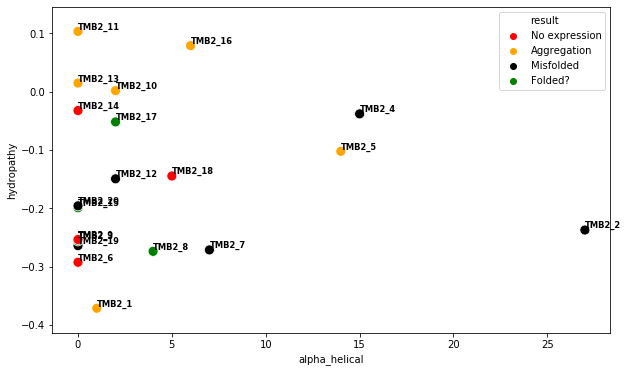

In [16]:
plt.figure(figsize=(10,6))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.hydropathy,hue=df.result,palette=['red','orange','black','green'],s=100)
#plt.scatter(x=1, y=-0.259, color="magenta", marker='X',s=100)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.hydropathy[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


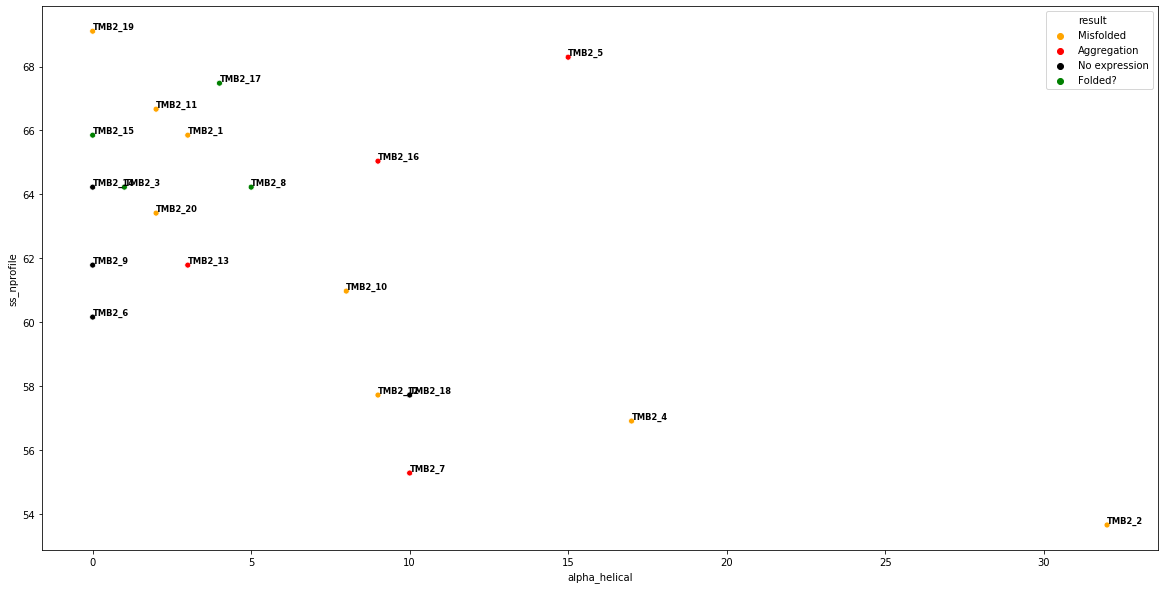

In [20]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.ss_nprofile,hue=df.result,palette=['orange','red','black','green'])

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.ss_nprofile[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


Analysis All

In [14]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity', 'dstr','dstr_core','dstr_surf','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','round of design','result','beta_sheet','coil','helix']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
no_expression = ['TMB2_14','TMB2_6','TMB2_9','TMB2_18','TMB2_51','TMB2_52','TMB2_53','TMB2_54','TMB2_56','TMB2_59','TMB2_61','TMB2_65','TMB2_66','TMB2_77','TMB2_78','TMB2_82','TMB2_84','TMB2_89','TMB2_90']
#promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_43','TMB2_47','TMB2_49','TMB2_58','TMB2_60','TMB2_63','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_74','TMB2_78','TMB2_81']
promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_37','TMB2_43','TMB2_45','TMB2_47',"TMB2_58",'TMB2_60','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_75','TMB2_81','TMB2_83']

df = pd.DataFrame(columns=columns)

for file in glob.glob("ss3_nprofile/*.ss3_simp*"):
    design_name = (file.split('/')[1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = ""
    outcome = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    elif design_name in ["OmpT3","4fuv","4rlc","1thq","2erv","1p4t"]:
        dround = "ref"
    elif "TMB0" in design_name:
        dround = "0"
    else:
        dround = "sol"
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1]
            line_ss = lines[2]
            if line_seq[0] == "M":
                sequence = line_seq[1:].strip()
                ss = line_ss[1:].strip()
            else:
                sequence = line_seq.strip()
                ss = line_ss.strip()
    print(file, len(ss))
    identity = ss_pred(ss,dround,design_name)
    distr = aa_distribution(sequence,dround,design_name)
    distr_surf = aa_distribution_surface(sequence,dround,design_name)
    distr_core = aa_distribution_core(sequence,dround,design_name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,design_name)
    hydro_surf = GRAVY_surf(sequence,dround,design_name)
    hydro_diff = hydro_surf-hydro_core
    
    if dround == "0" or dround == "1":
        outcome = 'No expression'
    elif design_name in no_expression:
        outcome = 'No expression'
    elif design_name in ["OmpT3","4fuv","4rlc","1thq","2erv","1p4t"]:
        outcome = "native"
    elif design_name in promising:
        outcome = "Possibly folded"
    elif dround == "sol":
        outcome = "Surface redesign"
    else: 
        outcome = 'Expression'
    
    F_freq = distr['F']
    aro_freq = distr['F'] + distr['W'] + distr['Y']
    beta_sheet = ss.count('E')/len(ss)*100
    coil = ss.count('C')/len(ss)*100
    helix = ss.count('H')/len(ss)*100
    df.loc[design_name] = [sequence,ss,identity,dstr_r,dstr_core_r,dstr_surf_r,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,dround,outcome,beta_sheet,coil,helix]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df)

ss3_nprofile/TMB2_29.ss3_simp 123
ss3_nprofile/TMB2_71.ss3_simp 123
ss3_nprofile/TMB1_13.ss3_simp.txt 123
ss3_nprofile/TMB0_4.ss3_simp 123
ss3_nprofile/TMB2_39.ss3_simp 123
ss3_nprofile/TMB1_12.ss3_simp.txt 123
ss3_nprofile/TMB2_36.ss3_simp 123
ss3_nprofile/TMB2_61.ss3_simp 123
ss3_nprofile/TMB2_88.ss3_simp 123
ss3_nprofile/TMB2_87.ss3_simp 123
ss3_nprofile/TMB1_10.ss3_simp.txt 123
ss3_nprofile/TMB2_5.ss3_simp 123
ss3_nprofile/TMB2_51.ss3_simp 123
ss3_nprofile/TMB2_16.ss3_simp 123
ss3_nprofile/TMB2_19.ss3_simp 123
ss3_nprofile/1p4t.ss3_simp 123
ss3_nprofile/TMB1_11.ss3_simp.txt 123
ss3_nprofile/TMB2_41.ss3_simp 123
ss3_nprofile/TMB0_3.ss3_simp 123
ss3_nprofile/TMB2_31.ss3_simp 123
ss3_nprofile/TMB2_66.ss3_simp 123
ss3_nprofile/TMB2_69.ss3_simp 123
ss3_nprofile/TMB2_80.ss3_simp 123
ss3_nprofile/TMB1_14.ss3_simp.txt 123
ss3_nprofile/TMB1_15.ss3_simp.txt 123
ss3_nprofile/czh_b.ss3_simp 111
ss3_nprofile/TMB2_21.ss3_simp 123
ss3_nprofile/TMB2_79.ss3_simp 123
ss3_nprofile/1thq.ss3_simp 119
s

In [15]:
dagg = pd.read_pickle("aggregation_data_2.pkl")


In [16]:
dall = pd.concat([df, dagg], axis=1, join="inner")
print(dall)

                                                                                                                            sequence  \
TMB2_29  GDKPGSVQLYVVIGWNTDNTIQLEGGLEYALSPYLSVFAGYGWNNSSLNFFTFGGGVKYTLTPDLEPYVRAGFKYNTDNTIKPQFGGGADYKLSPDLKGKIDYGWNNSSLNFIAFGAAYQLQP   
TMB2_71  QPVPGSVFITVAIGYNTDNTLKIMGGLEYVVSPYGSVVAGYGWNNSSLNEIKVGGGLHYKLSPDIFPYVVAGVVYNTDNTLKPTAGGGVLYKLSPELFARVEYGWNNSSLQEVLVGAAYRVRP   
TMB1_13  GLKKGELRFYLSFGLTSDGKLELSAGIELALSPYLSLRAGFGLTSDGKLHFQIGAGFHIPVSPNVEAYISLGAGLSKDGKKSPSAGFGAHLHVTPDLHIHLELGLTSDGRLRLSAGASIKFGG   
TMB0_4   EDDQGEYKVYIKIGYSSDGKYSVELGIKWSLTPYLELKIGLGYRSDGKWRIKVGVGLKYPVTPDWRIYISIGLGYSSDGKKEPKVGIGLEYRLSPDWEIEVEIGYSSDGRWEIEIGIQYRFGK   
TMB2_39  GPQPGSIWITVAVGYNTDNTLDLLGGLTYALTPYLEVSAGYGWNNSSLNRAKAGGGVTYDLSPEIEPYVTAGFDYNTDNTIKPSAGAGFKYKLTPDLALRVEYGWNNSSLQKIDIGADYKVQP   
...                                                                                                                              ...   
TMB2_84  APGPGSLFLEVVAGYNTDNTIVVRGGLRYALSPYLNLMA

In [17]:
print(df['hydropathy_core'].values)

[-1.285      -0.4025     -1.78       -2.38       -1.575      -1.9525
 -1.32       -0.69       -0.67       -0.695      -1.965      -0.91
 -0.785      -0.0775     -1.4125     -1.48974359 -2.0325     -0.72
 -2.3575     -0.5025     -0.73       -1.0675     -0.6975     -2.0525
 -2.0425      1.6875     -0.695      -0.95       -0.35789474 -0.9075
 -0.595      -0.2975      1.284375   -0.795      -0.255      -1.1775
 -1.02162162 -1.79       -1.565      -1.16        1.515625   -0.67
 -0.74       -0.865      -0.7225     -0.76       -1.0275     -0.8125
  1.7625     -1.1875     -0.75       -1.105      -2.3475     -0.695
 -1.08       -1.0825      1.89375    -0.44       -1.1225     -1.4075
 -2.4        -1.195      -2.4425     -1.2475     -0.8275     -1.1975
 -2.37       -0.9525     -0.9475     -1.2        -0.88       -1.1025
 -1.375      -1.4475     -0.935      -0.89       -2.575      -1.905
 -1.1925     -1.8475     -1.2225     -0.395       1.89375    -0.4075
 -1.01        1.7625     -0.765      -0.88

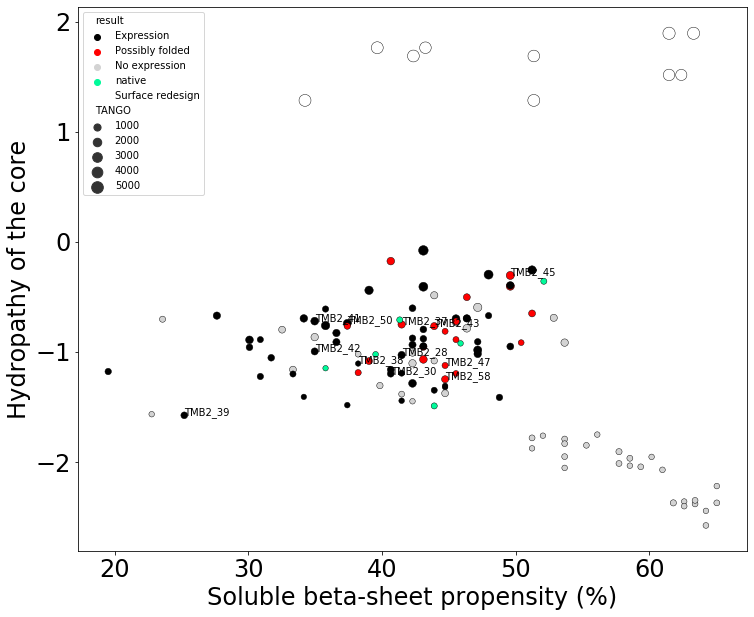

In [18]:
plt.figure(figsize=(12,10))
pl = sns.scatterplot(x=dall.beta_sheet,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for line in range(0,dall.shape[0]):
#    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if dall.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.beta_sheet[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

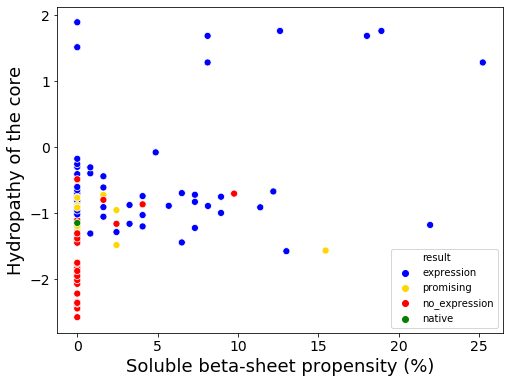

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.helix,y=df.hydropathy_core,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

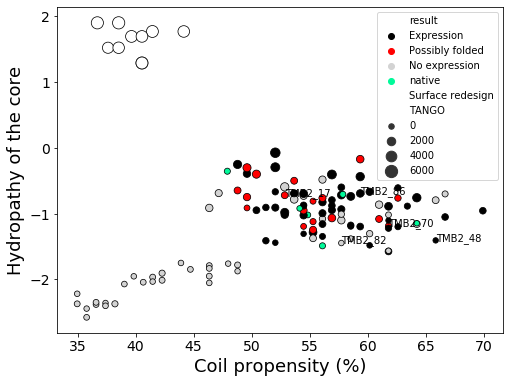

In [18]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df.coil,y=df.hydropathy_core,hue=df['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Coil propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)
for line in range(0,dall.shape[0]):
    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.coil[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')


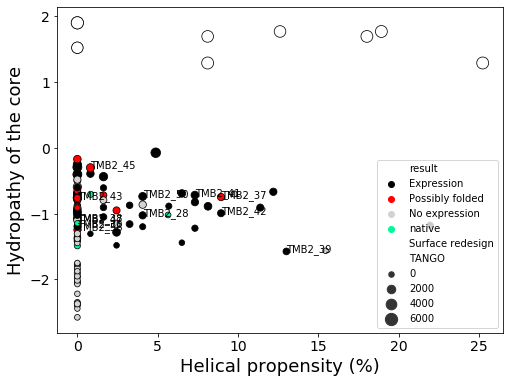

In [17]:
plt.figure(figsize=(8,6))
pl=sns.scatterplot(x=dall.helix,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Helical propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,dall.shape[0]):
#    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if dall.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.helix[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

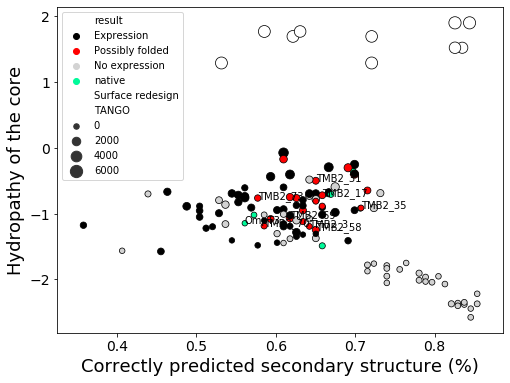

In [15]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=dall.identity,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correctly predicted secondary structure (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,dall.shape[0]):
    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.identity[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

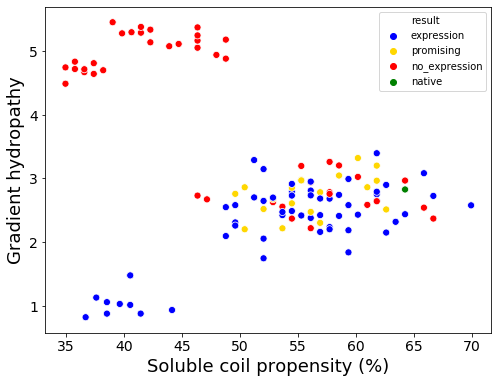

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.coil,y=df.ratio_hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble coil propensity (%)', size=18)
plt.ylabel('Gradient hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

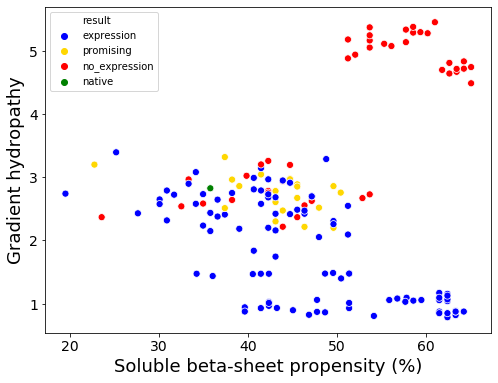

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.beta_sheet,y=df.ratio_hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Gradient hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text yticklabel objects>)

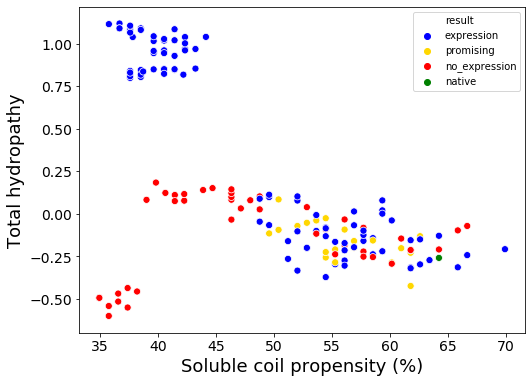

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.coil,y=df.hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble coil propensity (%)', size=18)
plt.ylabel('Total hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text yticklabel objects>)

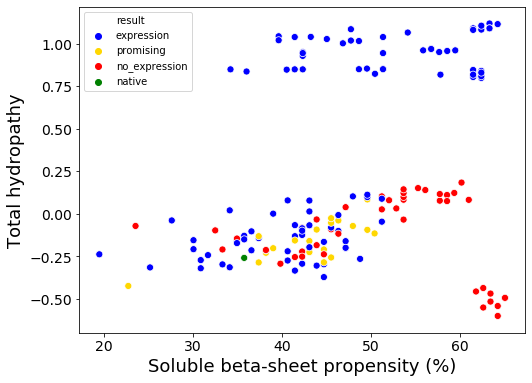

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.beta_sheet,y=df.hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Total hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

In [19]:
#df_2 = df.loc[(df['round of design'] == "2") | (df['round of design'] == "ref")]
df2 = dall.loc[~(dall['round of design'] == "sol")]
#df_2["alpha_helical"] = df_2["ss"].str.count('H')
print(df2)

                                                                                                                            sequence  \
TMB2_29  GDKPGSVQLYVVIGWNTDNTIQLEGGLEYALSPYLSVFAGYGWNNSSLNFFTFGGGVKYTLTPDLEPYVRAGFKYNTDNTIKPQFGGGADYKLSPDLKGKIDYGWNNSSLNFIAFGAAYQLQP   
TMB2_71  QPVPGSVFITVAIGYNTDNTLKIMGGLEYVVSPYGSVVAGYGWNNSSLNEIKVGGGLHYKLSPDIFPYVVAGVVYNTDNTLKPTAGGGVLYKLSPELFARVEYGWNNSSLQEVLVGAAYRVRP   
TMB1_13  GLKKGELRFYLSFGLTSDGKLELSAGIELALSPYLSLRAGFGLTSDGKLHFQIGAGFHIPVSPNVEAYISLGAGLSKDGKKSPSAGFGAHLHVTPDLHIHLELGLTSDGRLRLSAGASIKFGG   
TMB0_4   EDDQGEYKVYIKIGYSSDGKYSVELGIKWSLTPYLELKIGLGYRSDGKWRIKVGVGLKYPVTPDWRIYISIGLGYSSDGKKEPKVGIGLEYRLSPDWEIEVEIGYSSDGRWEIEIGIQYRFGK   
TMB2_39  GPQPGSIWITVAVGYNTDNTLDLLGGLTYALTPYLEVSAGYGWNNSSLNRAKAGGGVTYDLSPEIEPYVTAGFDYNTDNTIKPSAGAGFKYKLTPDLALRVEYGWNNSSLQKIDIGADYKVQP   
...                                                                                                                              ...   
TMB2_84  APGPGSLFLEVVAGYNTDNTIVVRGGLRYALSPYLNLMA

In [20]:
df2 = df2.rename(columns={"TANGO": "Aggregation propensity"})


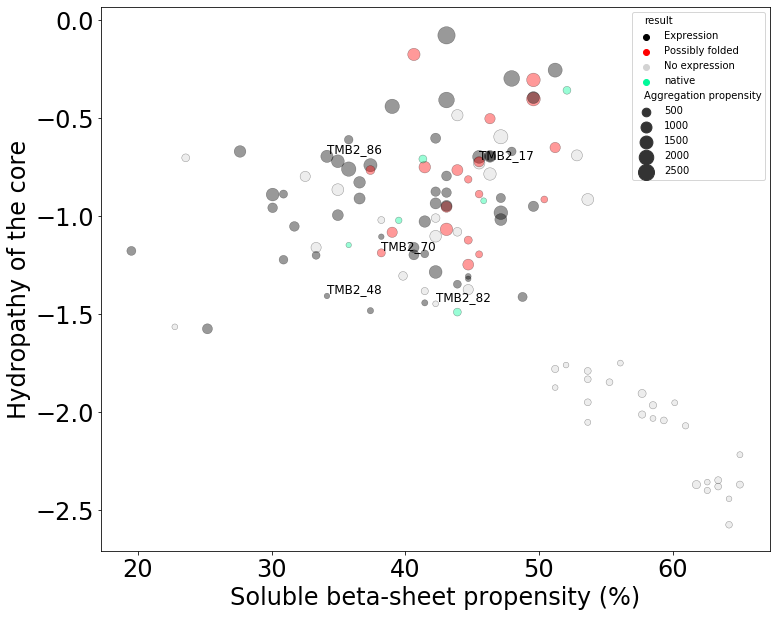

In [57]:
plt.figure(figsize=(12,10))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2.hydropathy_core,hue=df2['result'],palette=["black","red","lightgray","mediumspringgreen"],edgecolor='black',alpha=0.4,s=50,size=df2["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
        pl.text(df2.beta_sheet[line], df2.hydropathy_core[line], df2.index[line], verticalalignment='bottom', size=12, color='black')

plt.savefig('rounds_of_design.png', dpi=150)

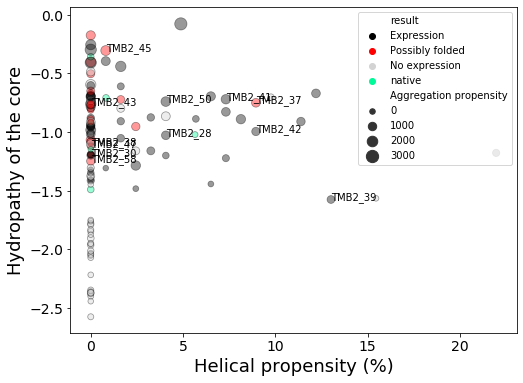

In [25]:
plt.figure(figsize=(8,6))
pl =sns.scatterplot(x=df2.helix,y=df2.hydropathy_core,hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,alpha=0.4,size=df2["Aggregation propensity"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Helical propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.helix[line], df2.hydropathy_core[line], df2.index[line], size=10, color='black')
        

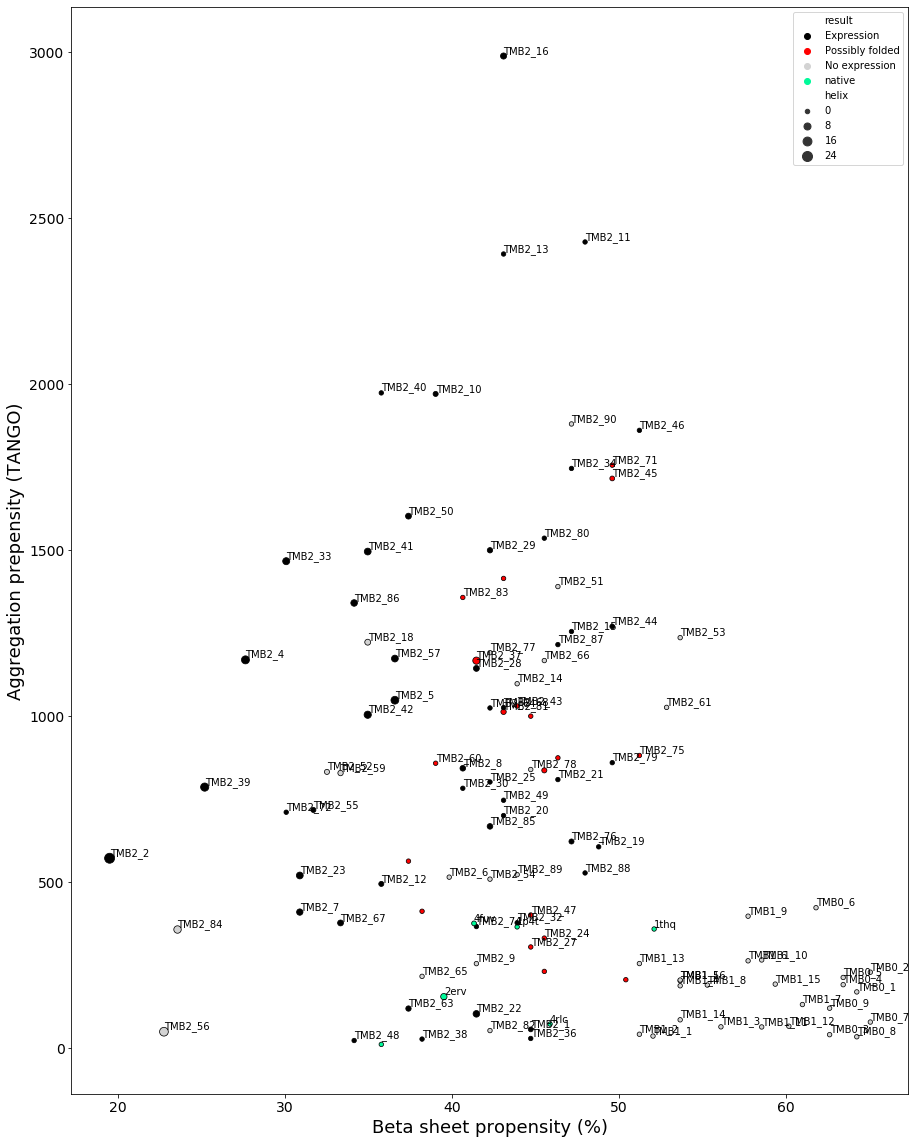

In [17]:
plt.figure(figsize=(15,20))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['Aggregation propensity'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (TANGO)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] not in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['Aggregation propensity'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

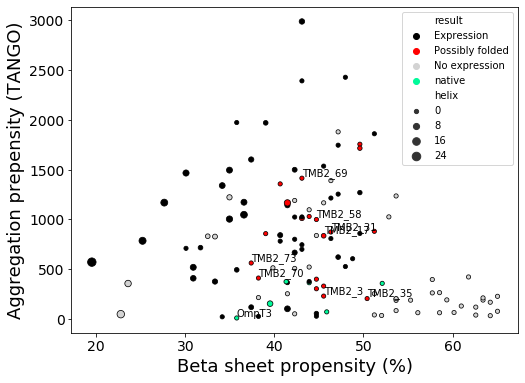

In [29]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['Aggregation propensity'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],size=df2["helix"],edgecolor='black',s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (TANGO)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['Aggregation propensity'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

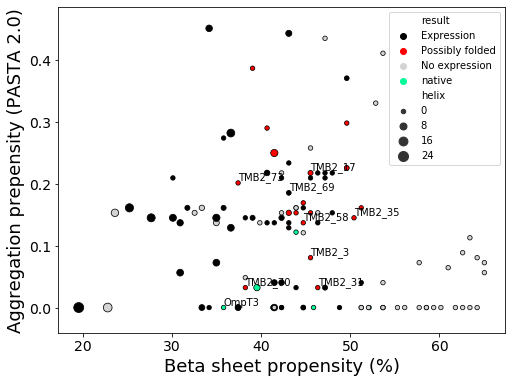

In [30]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['PASTA 2.0'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (PASTA 2.0)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['PASTA 2.0'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

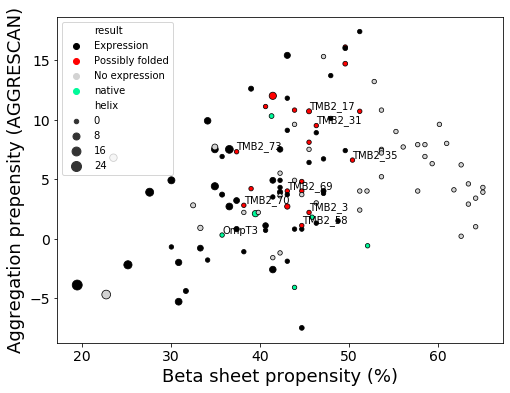

In [31]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['AGGRESCAN'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (AGGRESCAN)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['AGGRESCAN'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

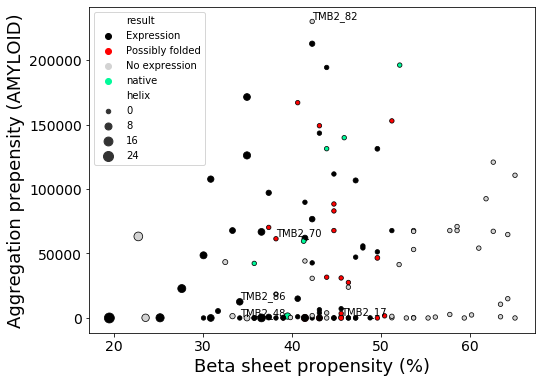

In [26]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['AMYLOID'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (AMYLOID)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
        pl.text(df2.beta_sheet[line], df2['AMYLOID'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

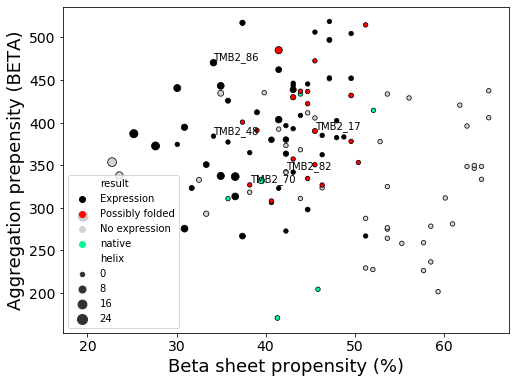

In [27]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['BETA'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (BETA)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
        pl.text(df2.beta_sheet[line], df2['BETA'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

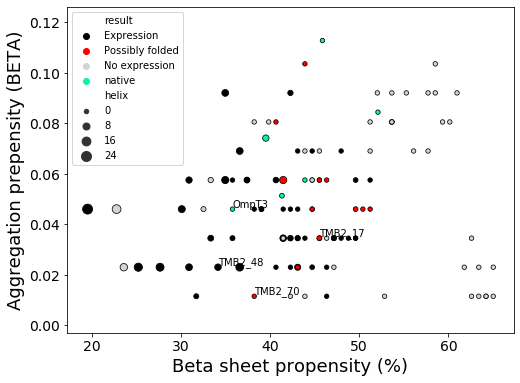

In [68]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['F'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (BETA)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['F'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

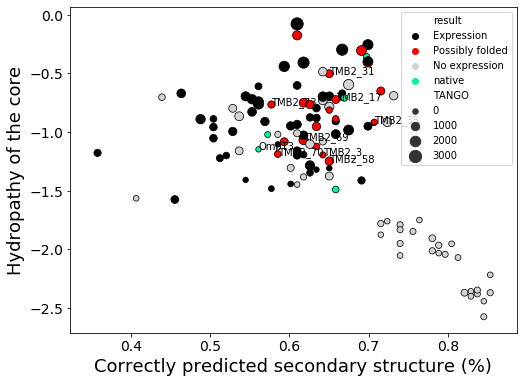

In [19]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.identity,y=df2.hydropathy_core,hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correctly predicted secondary structure (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.identity[line], df2.hydropathy_core[line], df2.index[line], verticalalignment='baseline', size=10, color='black')


In [22]:
df_center = df2[(df2["beta_sheet"]>38)&(df2["beta_sheet"]<51)]
print(df_center)

                                                                                                                            sequence  \
TMB2_29  GDKPGSVQLYVVIGWNTDNTIQLEGGLEYALSPYLSVFAGYGWNNSSLNFFTFGGGVKYTLTPDLEPYVRAGFKYNTDNTIKPQFGGGADYKLSPDLKGKIDYGWNNSSLNFIAFGAAYQLQP   
TMB2_71  QPVPGSVFITVAIGYNTDNTLKIMGGLEYVVSPYGSVVAGYGWNNSSLNEIKVGGGLHYKLSPDIFPYVVAGVVYNTDNTLKPTAGGGVLYKLSPELFARVEYGWNNSSLQEVLVGAAYRVRP   
TMB2_36  SDPPGTIAVEVKGGYNTDNTVTIEGGVRYAVTPYVFLRIGYGWNNSSLNFLSIGGGADYRVSPELEPYVEAGFKYNTDNTIKPFAGAGFDYRLSPDGAASVDYGWNNSSLNFVKAGAMYRLTK   
TMB2_88  QDQPGTVALEVSVGYNTDNTFKFVGGAEYALSPYLLVDAGYGWNNSSLNTGEFGGGVMYVVSPEIEPYVVAGAKFNTDNTIKPLIGAGFKYRLSPNLALKLDYGWNNSSLQFVRIGLVYKVKE   
TMB2_87  QGQPGTVAVVVAVGYNTDNTLELEGGVRYVLSPYLVLEAGYGWNNSSLNVGSAGGGVMYVLSPDIEPYVVAGLQFNTDNTVKPAAGAGADYRLSPELAATADYGWNNSSLQKVRVGARYKLKD   
...                                                                                                                              ...   
TMB2_9   GPGPGSVAIEVAVGYNTDNTLDIEGGLLYAVSPYFELVA

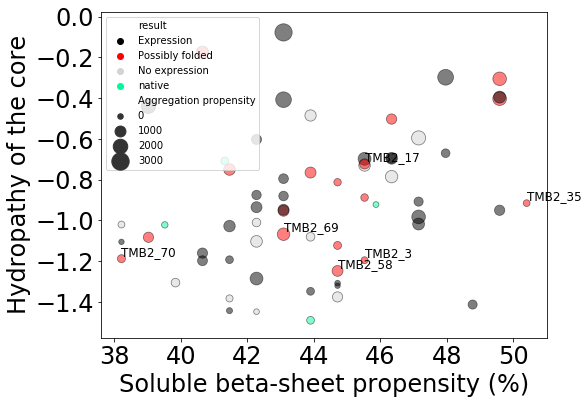

In [24]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_center.beta_sheet,y=df_center.hydropathy_core,hue=df_center['result'],palette=["black","red","lightgray","mediumspringgreen"],edgecolor='black',alpha=0.5,s=50,size=df_center["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for line in range(0,df_center.shape[0]):
    if df_center.index[line] in ["TMB2_3","TMB2_17","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df_center.beta_sheet[line], df_center.hydropathy_core[line], df_center.index[line], verticalalignment='bottom', size=12, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

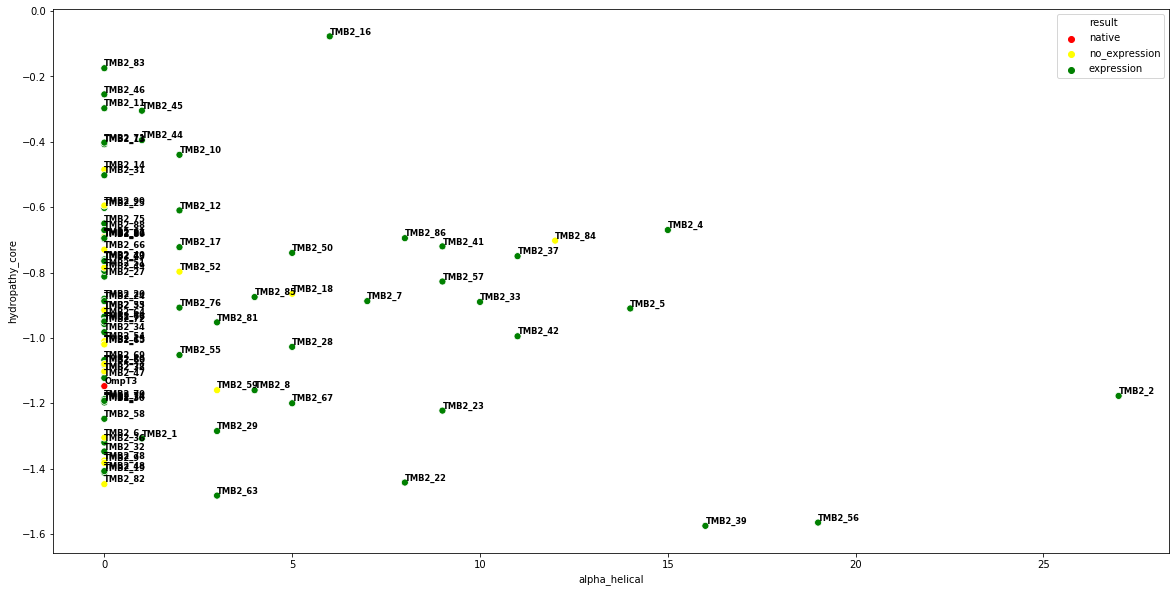

In [23]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.hydropathy_core,hue=df.result,palette=['red','yellow','green'],s=50)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.hydropathy_core[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


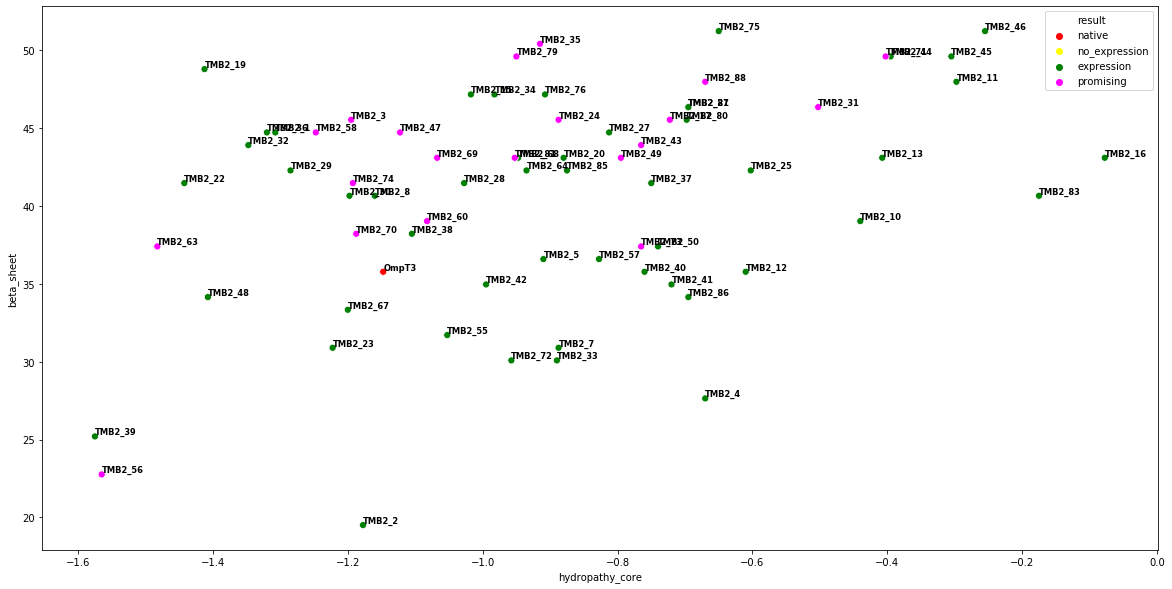

In [20]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.hydropathy_core,y=df_2.beta_sheet,hue=df.result,palette=['red','yellow','green','magenta'],s=50)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.hydropathy_core[line], df_2.beta_sheet[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


In [ ]:
df["coil"] = df["ss"].str.count('E')/123*100

In [32]:
print(df2[df2.helix>7])

                                                                                                                            sequence  \
TMB2_39  GPQPGSIWITVAVGYNTDNTLDLLGGLTYALTPYLEVSAGYGWNNSSLNRAKAGGGVTYDLSPEIEPYVTAGFDYNTDNTIKPSAGAGFKYKLTPDLALRVEYGWNNSSLQKIDIGADYKVQP   
TMB2_5   GTQPGSVHVYLVAGWNTDNTISAWGGVVYALSPYLVLEIGYGWNNSSLNRIRIGGGAAYQVSPELDPYVFAGGDWNTDNTLKPTGGVGFWYRLSPDLALDVQYGWNNSSLQELVAGLTYRLTP   
TMB2_41  GPKPGSVYLVVAGGYNTDNTFQLWGGLSYVLSPYLDFSAGYGWNNSSLNFFVAGGGFLYTVSPEVEPYVAAGAKYNTDNTLSPFAGAGAFYRLSPQLEARIEYGWNNSSLNEIEAGFRYQVQP   
TMB2_2   PDEPGTIKLDIAVGWNTDNTLDFVGGLEYAVSPYVSVFAGYGWNNSSLNAAKFGGGAKYKLTPDLEPYVAAGAKYNTDNTIKPFAGAGADYKLSPQLEARAEYGWNNSSLQMAEAGVAYSLVG   
TMB2_56  KGKPGTVEIMVMAGWNTDNTIKFAGGLDYDLSPYVFLRAGYGWNNSSLNEFEAGGGVKYELTPDLSPYAWAGVKYNTDNTVKPTAGAGAEYKLSPDLAALIEYGWNNSSLNDVRAGFKYKLKE   
TMB2_4   GDQPGTVAVYLVAGWNTDNTIQAEGGLQYALSPYLALDVGYGWNNSSLNKVKIGGGVSYTLSPDIDPFAFAGIRWNTDNTIKPTAGAGAKYRLSPELAALIAYGWNNSSLQSIVAGAAYKVTP   
TMB2_37  GPKPGSVYLVVEVGYNTDNTFELVGGLMYALSPYLTLSA

In [ ]:
promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_37','TMB2_43','TMB2_45','TMB2_47',"TMB2_58",'TMB2_60','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_75','TMB2_81','TMB2_83']


In [21]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation = {'1i78':339.747,'1k24':11.7284,"2vdf":11.7783,'2x4m':302.621,"2x55":302.968}

df_nat = pd.DataFrame(columns=columns)

for file in glob.glob("/home/av9/beta_barrel/natural_proteins/membrane/10-12/*_trim.ss3_simp"):
    name = (file.split('/')[-1]).split('_trim')[0]
    sequence = ""
    ss = ""
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
            line_ref = lines[3].strip()
            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
    ref_ss = line_ref.strip()
    mem = line_mem.strip()
    print(file, len(ss))
    identity = ss_pred_native(ss,name,ref_ss)
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core_native(sequence,name,mem)
    hydro_surf = GRAVY_surf_native(sequence,name,mem)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = ss.count('E')/len(ss)*100
    coil = ss.count('C')/len(ss)*100
    helix = ss.count('H')/len(ss)*100
    df_nat.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation[name],'native_10']
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_nat)

/home/av9/beta_barrel/natural_proteins/membrane/10-12/2x4m_trim.ss3_simp 138
[2, 4, 6, 8, 16, 18, 20, 22, 24, 30, 32, 34, 36, 44, 46, 48, 50, 52, 62, 64, 66, 74, 76, 78, 80, 82, 87, 89, 91, 93, 101, 103, 105, 107, 109, 115, 117, 119, 121, 129, 131, 133, 135, 137]
[1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 61, 63, 65, 67, 73, 75, 77, 79, 81, 83, 86, 88, 90, 92, 94, 100, 102, 104, 106, 108, 110, 114, 116, 118, 120, 122, 128, 130, 132, 134, 136, 138]
/home/av9/beta_barrel/natural_proteins/membrane/10-12/1i78_trim.ss3_simp 138
[2, 4, 6, 8, 16, 18, 20, 22, 24, 26, 30, 32, 34, 36, 44, 46, 48, 50, 52, 62, 64, 66, 74, 76, 78, 80, 82, 87, 89, 91, 93, 101, 103, 105, 107, 109, 115, 117, 119, 121, 129, 131, 133, 135, 137]
[1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 61, 63, 65, 67, 73, 75, 77, 79, 81, 83, 86, 88, 90, 92, 94, 100, 102, 104, 106, 108, 110, 114, 116, 118, 120, 122, 128, 130, 132, 134, 136, 138]
/home/av9/

In [22]:
pd.options.display.max_colwidth = 200
#columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix']
#native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
#native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
#native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation = {'1uyn':1076.14,'2qom':149.265,"2wjr":134.488,'3aeh':157.946,"3fid":348.295,'3kvn':251.925,'3qq2':35.6055,'3slj':141.941,'4e1s':213.556,'4e1t':572.279,'4fqe':750.985,'4mee':482.387,'4rl8':718.042,'5o65':817.788,'5o67':820.086}

#df_nat = pd.DataFrame(columns=columns)

for file in glob.glob("/home/av9/beta_barrel/natural_proteins/membrane/12-14/*_trim.ss3_simp"):
    name = (file.split('/')[-1]).split('_trim')[0]
    sequence = ""
    ss = ""
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
            line_ref = lines[3].strip()
            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
    ref_ss = line_ref.strip()
    mem = line_mem.strip()
    print(file, len(ss))
    identity = ss_pred_native(ss,name,ref_ss)
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core_native(sequence,name,mem)
    hydro_surf = GRAVY_surf_native(sequence,name,mem)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = ss.count('E')/len(ss)*100
    coil = ss.count('C')/len(ss)*100
    helix = ss.count('H')/len(ss)*100
    df_nat.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation[name],'native_12']
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_nat)

/home/av9/beta_barrel/natural_proteins/membrane/12-14/1uyn_trim.ss3_simp 172
[2, 4, 6, 8, 16, 18, 20, 22, 24, 30, 32, 34, 36, 44, 46, 48, 50, 52, 58, 60, 62, 64, 72, 74, 76, 78, 80, 87, 89, 91, 93, 101, 103, 105, 107, 109, 111, 117, 119, 121, 123, 125, 133, 135, 137, 139, 141, 143, 149, 151, 153, 155, 163, 165, 167, 169, 171]
[1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 57, 59, 61, 63, 65, 71, 73, 75, 77, 79, 81, 86, 88, 90, 92, 94, 100, 102, 104, 106, 108, 110, 112, 116, 118, 120, 122, 124, 126, 132, 134, 136, 138, 140, 142, 144, 148, 150, 152, 154, 156, 162, 164, 166, 168, 170, 172]
/home/av9/beta_barrel/natural_proteins/membrane/12-14/3qq2_trim.ss3_simp 182
[2, 4, 6, 8, 16, 18, 20, 22, 24, 33, 35, 37, 39, 47, 49, 51, 53, 55, 61, 63, 65, 67, 75, 77, 79, 81, 83, 85, 91, 93, 95, 97, 99, 107, 109, 111, 113, 115, 117, 127, 129, 131, 133, 135, 143, 145, 147, 149, 151, 153, 159, 161, 163, 165, 173, 175, 177, 179, 181]
[1, 3, 5, 7, 9, 15, 17, 19, 21, 2

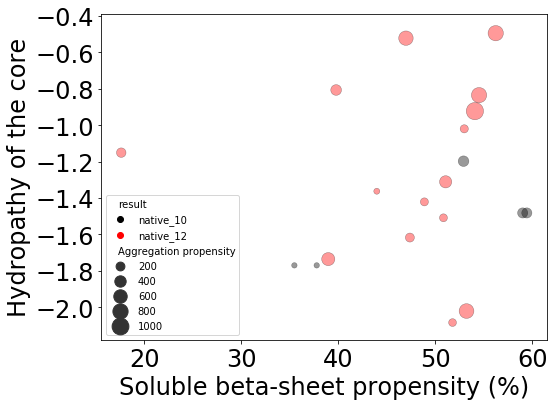

In [23]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_nat.beta_sheet,y=df_nat.hydropathy_core,hue=df_nat['result'],palette=["black","red"],edgecolor='black',alpha=0.4,s=50,size=df_nat["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig('rounds_of_design.png', dpi=150)

In [24]:
df_all = pd.concat([df2, df_nat])

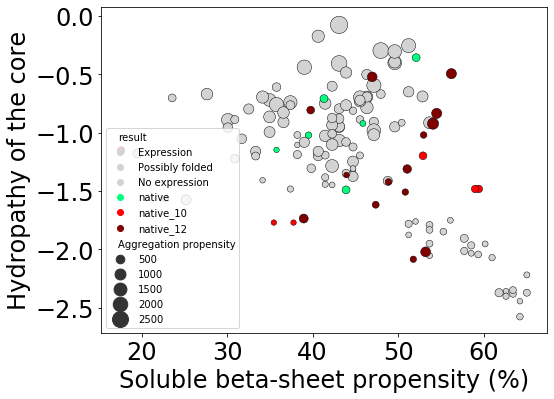

In [25]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon"],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig('native_ss.png', dpi=150)

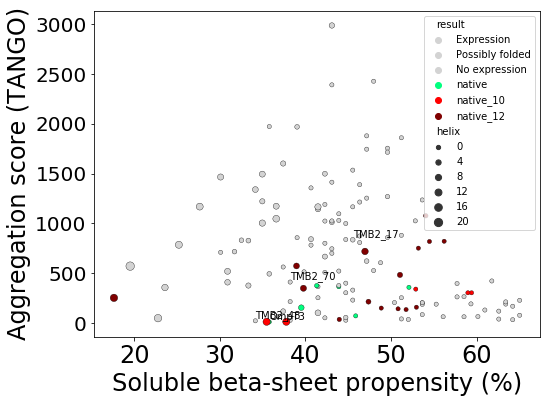

In [31]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all['Aggregation propensity'],hue=df_all['result'],palette=["lightgrey", "lightgrey","lightgrey","springgreen","red","maroon"],size=df_all["helix"],edgecolor='black',s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Aggregation score (TANGO)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df_all.beta_sheet[line], df_all['Aggregation propensity'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
        



(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

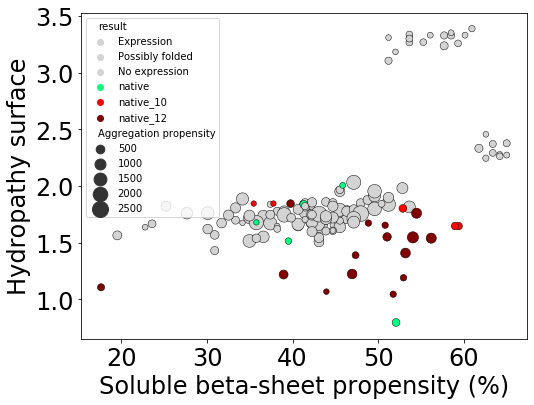

In [32]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_surface,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon"],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

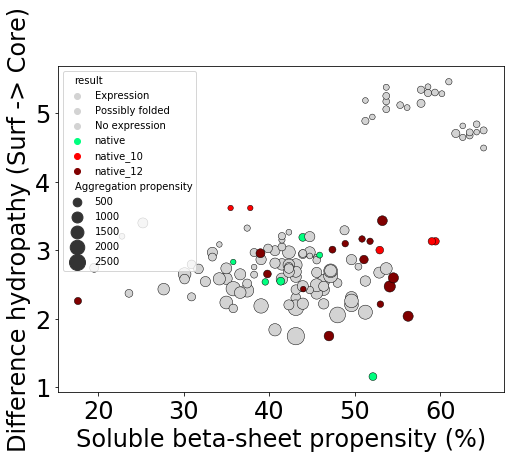

In [33]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.ratio_hydropathy,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon"],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Difference hydropathy (Surf -> Core)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

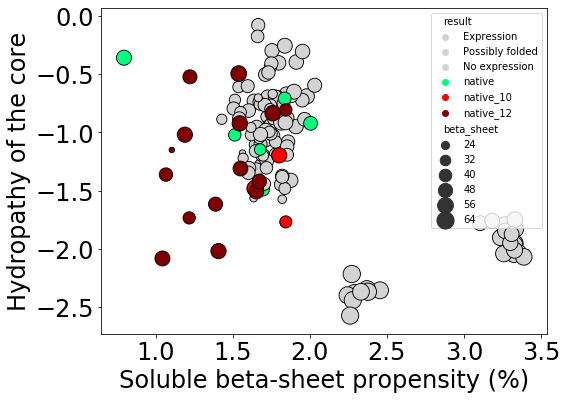

In [26]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.hydropathy_surface,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon"],edgecolor='black',alpha=1,s=50,size=df_all["beta_sheet"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [42]:
df_all.to_pickle("sequence_properties.pkl")